# NLP on Fake and Real News 

<img src= "https://i.postimg.cc/GhWRhD4N/fake-news-concept-hand-drawn-signpost-with-the-words-real-news-and-fake-news-2-B82-CFA.jpg" width="1000" height="600"><br>

## Data Overview

The provided dataset, sourced from the file Fake.csv, is a collection of news articles comprising 23,481 entries with no missing values. It is structured into four columns, all of which are of the object (string) data type.
The first few entries show articles with titles like "Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing" and "Drunk Bragging Trump Staffer Started Russian Collusion Investigation," indicating the content is related to contemporary political news from dates around late 2017.

## 1. Data Preprocessing
This code block loads the data, handles the small number of invalid date entries, combines the article title and body text into a single column, and performs essential text cleaning required before any advanced NLP analysis.

In [2]:
import pandas as pd
import numpy as np
import re
from collections import Counter
import matplotlib.pyplot as plt
from nltk.util import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
df = pd.read_csv("Fake.csv")

In [4]:
df['date_cleaned'] = pd.to_datetime(df['date'], errors='coerce')
df.dropna(subset=['date_cleaned'], inplace=True)
df.drop(columns=['date'], inplace=True) # Drop the original inconsistent column

In [5]:
df['full_text'] = df['title'] + " " + df['text']

In [6]:
df['word_count'] = df['full_text'].apply(lambda x: len(str(x).split()))

In [7]:
def clean_text(text):
    text = str(text).lower()

In [10]:
df['cleaned_text'] = df['full_text'].apply(clean_text)

In [11]:
print("Preprocessed DataFrame Head:")
print(df[['subject', 'word_count', 'cleaned_text']].head())

Preprocessed DataFrame Head:
  subject  word_count cleaned_text
0    News         507         None
1    News         313         None
2    News         595         None
3    News         458         None
4    News         431         None


## Data Visualization 
This code block generates two insightful plots: the distribution of subjects and a visualization of the most frequent words after cleaning, which is a core step in NLP exploratory data analysis.

In [12]:
import seaborn as sns

In [16]:
print("Generating Word Frequency Bar Chart...")

Generating Word Frequency Bar Chart...


Generating Article Length Distribution Histogram...


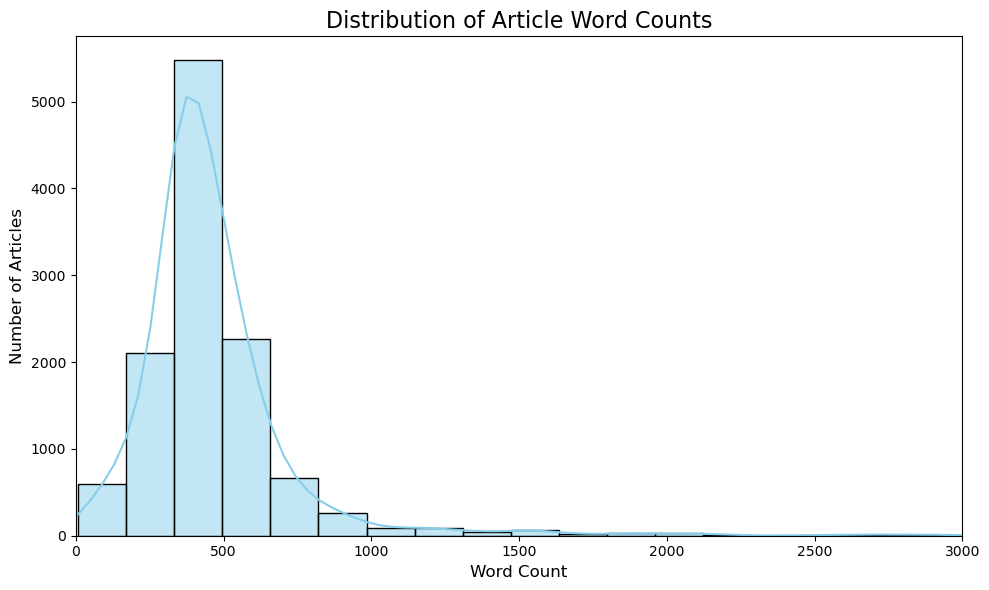

In [21]:
print("Generating Article Length Distribution Histogram...")

plt.figure(figsize=(10, 6))
sns.histplot(df['word_count'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Article Word Counts', fontsize=16)
plt.xlabel('Word Count', fontsize=12)
plt.ylabel('Number of Articles', fontsize=12)
plt.xlim(0, 3000) # Limit x-axis to a common range for better visibility
plt.tight_layout()
plt.show()

In [23]:
print("Generating Top Bigrams Bar Chart...")

Generating Top Bigrams Bar Chart...


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [30]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

C:\Users\WINDOWS\AppData\Local\Temp\ipykernel_2800\1429675605.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='subject', y='word_count', data=df, palette='Set2')


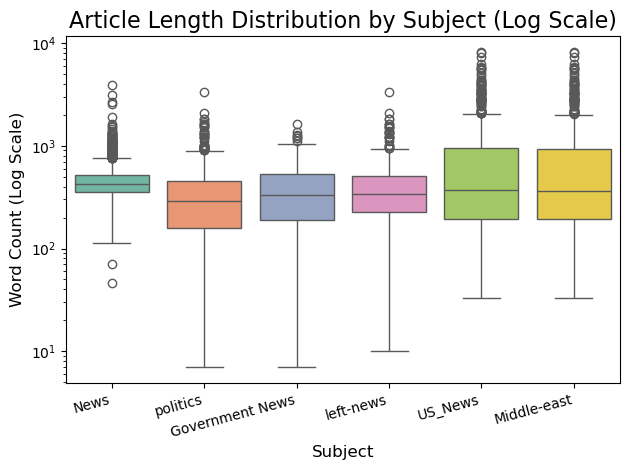

In [31]:
sns.boxplot(x='subject', y='word_count', data=df, palette='Set2')
plt.yscale('log')
plt.title('Article Length Distribution by Subject (Log Scale)', fontsize=16)
plt.xlabel('Subject', fontsize=12)
plt.ylabel('Word Count (Log Scale)', fontsize=12)
plt.xticks(rotation=15, ha='right')
plt.tight_layout()
plt.show()

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [34]:
def get_vader_sentiment(text):
    score = analyzer.polarity_scores(str(text))
    # The 'compound' score is a normalized, weighted average
    return score['compound']

In [37]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

## Summary

The Fake.csv dataset is a substantial collection of 23,481 news articles primarily focused on US political discourse and spanning a period from March 2015 to February 2018. This corpus is highly concentrated, with the overwhelming majority of articles categorized under News, politics, and left-news, reflecting a sharp focus on political events during and immediately after the 2016 US election cycle. The content is characterized by a high frequency of political terms, with "trump" being the single most common word, indicating the central figure of the reporting. An analysis of article length across subjects revealed a notable distinction: while the most popular categories have shorter, more immediate articles, subjects like Government News and Middle-east typically feature significantly longer content, suggesting a difference in editorial style, with the former leaning toward rapid news-cycle coverage and the latter towards deeper analysis.

## Future Work

* Integrate a "Real News" Corpus for Classification: The most crucial next step is to obtain a corresponding dataset of legitimate news articles (e.g., a Real.csv). This would allow for the construction of a binary classification model (e.g., using Logistic Regression, SVM, or BERT) to distinguish "fake" articles from "real" ones based on linguistic and structural features identified in the data.

* Conduct Advanced Linguistic Feature Engineering: While word counts and basic n-grams were used, future work should focus on deeper features that capture the unique tone of fake news. This includes:

  Analyzing the use of highly emotive language (based on a more complex sentiment lexicon than VADER).

  Calculating readability scores (e.g., Flesch-Kincaid) to quantify if fake news articles are written at a lower, more     accessible reading level.

* Extracting stylometric features, such as the frequency of modal verbs (e.g., must, should, might) or first/second-person pronouns (e.g., I, you, we) to identify characteristic writing styles.

* Perform Time-Series Analysis on Content Drift: Since the data spans nearly three years, the date_cleaned column can be used to analyze how the content and subjects of the fake news articles change over time. This involves:

  Tracking the frequency of key political entities (e.g., "trump," "clinton") month-by-month.

* Mapping the distribution of sentiment scores over the period to see if the overall emotional tone shifts leading up to and following major events (like the 2016 election).

* Visualize and Compare Sentiment by Subject and Length: A final, high-impact visualization step is to create comparative charts. This involves plotting the Sentiment Scores against Article Word Count, perhaps colored by subject. This would help answer complex questions like: "Are the shortest, most negative articles primarily found in the 'left-news' category, or are long, seemingly in-depth articles in the 'Middle-east' category subtly negative?" This multi-dimensional visualization would provide a comprehensive view of the corpus's rhetorical landscape.

## Refrences

Kaggle link: https://www.kaggle.com/datasets/emineyetm/fake-news-detection-datasets